# Embeddings

Embeddings are numerical representations of real-world objects, like words, images, or videos, into vectors (lists of numbers) that machine learning models can process

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

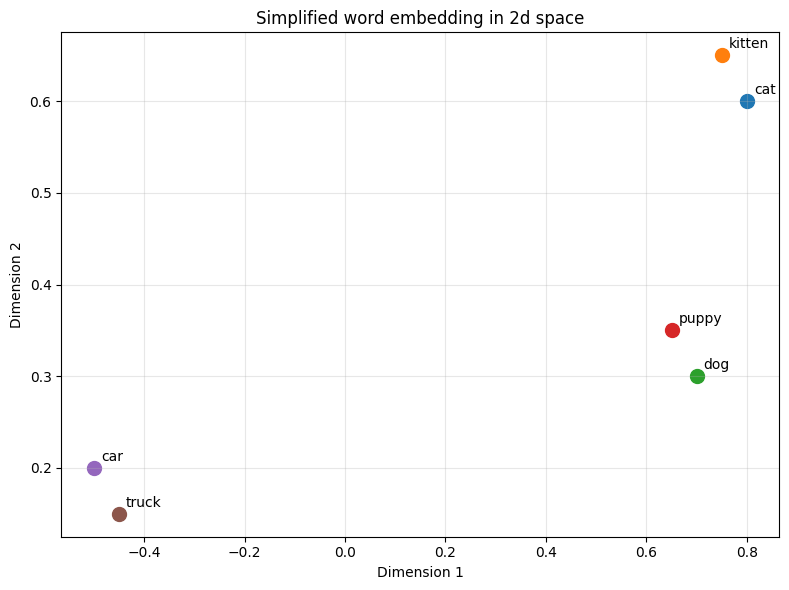

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5,5), textcoords="offset points")

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("Simplified word embedding in 2d space")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring similarity

In [5]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between the two vectors.
    - Result close to 1: very similar
    - Result close to 0: not related
    - Result close to -1: opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

In [6]:
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

In [9]:
print(f"Similarity between cat and kitten: {cosine_similarity(cat_vector, kitten_vector)}")
print(f"Similarity between cat and car: {cosine_similarity(cat_vector, car_vector)}")

Similarity between cat and kitten: 0.9966186334192181
Similarity between cat and car: -0.43718588548916804


# Creating your first embeddings

### Huggingface and OpenAI

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings

In [12]:
# Initialize a simple embedding model (no API key required)
embeddings = HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [ ]:
# Create your first embeddings
text = "Hello, I am learning about embeddings!"

embedding = embeddings.embed_query(text=text) # for single text, for more use embed_documents
print(f"Text: {text}")
print(f"Embedding length: {len(embedding)}")
print(f"Embedding: {embedding}")

Text: Hello, I am learning about embeddings!
Embedding length: 384
Embedding: [-0.018163302913308144, -0.09955164045095444, 0.01381608098745346, -0.00812594499439001, 0.01415224839001894, 0.06406485289335251, -0.006253342144191265, -0.003017926588654518, 0.02528722770512104, -0.020198646932840347, 0.024329710751771927, 0.07435058802366257, 0.051177166402339935, 0.022038469091057777, -0.05830620229244232, 0.0152682363986969, 0.023584363982081413, 0.09455390274524689, -0.06508844345808029, 0.013296704739332199, -0.020497571676969528, -0.05690852180123329, 0.030303362756967545, -0.08365613967180252, 0.026596326380968094, -0.015231468714773655, -0.043615419417619705, 0.053984012454748154, 0.0902571752667427, -0.08893883973360062, 0.039644643664360046, -0.008835039101541042, -0.03034372813999653, 0.07425568252801895, -0.05409920588135719, 0.11107998341321945, 0.036899883300065994, -0.008959820494055748, -0.06140241399407387, -0.0031433573458343744, 0.021958203986287117, 0.042208198457956314

In [16]:
texts = [
    "The cat sat on the mat",
    "A feline rested on the rug",
    "The dog played in the yard",
    "I love programming in python",
    "Python is my favourite programming language beacause I know only python"
]

embedding_texts = embeddings.embed_documents(texts=texts)
for embedding in embedding_texts:
    print(f"Embedding length: {len(embedding)}")
    print(f"Embedding: {embedding}")


Embedding length: 384
Embedding: [0.1304018646478653, -0.011870122514665127, -0.028117025271058083, 0.05123864859342575, -0.055974431335926056, 0.030191553756594658, 0.030161313712596893, 0.024698419496417046, -0.018370576202869415, 0.058766789734363556, -0.024953152984380722, 0.06015424057841301, 0.03983176127076149, 0.03323053568601608, -0.061311379075050354, -0.04937311261892319, -0.054863519966602325, -0.040076080709695816, 0.056429117918014526, 0.03915657103061676, -0.03473706170916557, -0.013247695751488209, 0.03196622431278229, -0.06349924951791763, -0.060178592801094055, 0.07823451608419418, -0.02830388955771923, -0.047442808747291565, 0.04035930335521698, -0.006630888674408197, -0.066740982234478, -0.004191335756331682, -0.025311658158898354, 0.05334164947271347, 0.01742810755968094, -0.09792358428239822, 0.0060613215900957584, -0.06524166464805603, 0.04557261988520622, 0.02364180237054825, 0.0765848308801651, -0.010264318436384201, -0.004076831508427858, -0.06232282519340515,

In [18]:
# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

